The Machine Learning ASSIGNMENT:

Instructor: Mugume Twinamatsiko Atwine

Student:Yiga Fahim

Reg Number: 2022/HD07/2054U


First Individual Project Assignment

You are a lead data scientist on a project regarding maternal health, you are provided with a dataset regarding featal health. (Please find the dataset in the data folder given). These are your instructions 1 - Use that dataset to do: EDA, Clean the data 2 - Use pandas Profiling to export a pdf report of your data (explain how the report informs your future decisions) 3 - Apply any needed transformations if possible. 4 - Choose a proper evaluation metric for your project. 5 - Do model spot checking to find the best model for your use. 6 - Build the chosen model 7 - Evaluate bias vs variance on your model and present your results.

Note:

Please follow instructions!
You have to explain in detail every step you are executing in your own words, your result will be based on how well you explain what steps you are executing.
Students are allowed to use public resources off the internet for their research, however students are not allowed to copy and paste code for this assignment (If you are caught, you will fail this assignment, you have been warned: especially chatGpt.)
This is a graded individual assignment any malpractice will lead to losing of points, this assignment contributes a great percentage to your final grade.
All assignments must be handed in by Close of Business next Wednesday by 6:00PM Date: 3rd - May - 2023
All your assignments will be handed in by means of a pull request to my original repository.
Please name your pull requests as per previously instructed, you will not get warnings for failing to do this.
Your work should be saved in the Project Folder (Create your own folder and give the folder your name.)

# **INSTRUCTION 1: From the dataset: performing EDA and data cleaning**


## **Installing Prequisites**

I inported these required packages

In [69]:
#Prerequisite: #import the necessary libraries
#%pip install pandas
import pandas as pd #this is for dataframe manipulation
import numpy as np #this is for numerical / mathematical computing
import matplotlib.pyplot as plt #this is for visualisation
import seaborn as sns #This offers high-level interface for creating informative and attractive statistical graphicsfrom pandas_profiling import ProfileReport
#%pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score

#let's remove the annoying warnings from our cells.

import warnings
warnings.filterwarnings('ignore')

In [45]:
#Loading the dataset
health_data1 = pd.read_csv('fetal_health.csv') #This line loads the dataset into a pandas dataframe called health_data1.

health_data1.T #I added the .T to allow me transpose the rows and columns, so that the rows become columns, and the columns become rows for easy viewing.

,0,1,2,3,4,5,6,7,8,9,...,2116,2117,2118,2119,2120,2121,2122,2123,2124,2125
baseline value,120.0,132.000,133.000,134.000,132.000,134.000,134.000,122.0,122.000,122.000,...,140.000,140.000,140.000,140.000,140.000,140.000,140.000,140.000,140.000,142.000
accelerations,0.0,0.006,0.003,0.003,0.007,0.001,0.001,0.0,0.000,0.000,...,0.004,0.000,0.000,0.000,0.000,0.000,0.001,0.001,0.001,0.002
fetal_movement,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.002
uterine_contractions,0.0,0.006,0.008,0.008,0.008,0.010,0.013,0.0,0.002,0.003,...,0.004,0.008,0.006,0.007,0.005,0.007,0.007,0.007,0.006,0.008
light_decelerations,0.0,0.003,0.003,0.003,0.000,0.009,0.008,0.0,0.000,0.000,...,0.000,0.000,0.001,0.001,0.001,0.000,0.000,0.000,0.000,0.000
severe_decelerations,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
prolongued_decelerations,0.0,0.000,0.000,0.000,0.000,0.002,0.003,0.0,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
abnormal_short_term_variability,73.0,17.000,16.000,16.000,16.000,26.000,29.000,83.0,84.000,86.000,...,80.000,79.000,79.000,79.000,77.000,79.000,78.000,79.000,78.000,74.000
mean_value_of_short_term_variability,0.5,2.100,2.100,2.400,2.400,5.900,6.300,0.5,0.500,0.300,...,0.200,0.300,0.500,0.600,0.700,0.200,0.400,0.400,0.400,0.400
percentage_of_time_with_abnormal_long_term_variability,43.0,0.000,0.000,0.000,0.000,0.000,0.000,6.0,5.000,6.000,...,36.000,20.000,26.000,27.000,17.000,25.000,22.000,20.000,27.000,36.000


**EDA**

The first thing I did was import data and then do EDA.

The dataset 'fetal_health.csv', also known as 'health_data1,' was subjected to some exploratory data analysis (EDA) using the codes listed below. 

In [48]:


#Perfroming EDA
print(health_data1.head(5)) #This line shows the top 5 rows of the dataset

print(health_data1.describe()) #This line displays descriptive statistics for each column of the dataset, including the count, mean, standard deviation, minimum, and maximum values.

print(health_data1.duplicated().sum()) #This line counts the number of duplicate rows in the dataset.

print(len(health_data1)) #This line prints the total number of rows in the dataset.

# print (health_data.isnull().sum()) #There was no missing value. #This was used to check for any missing values in the dataset.


   baseline value  accelerations  fetal_movement  uterine_contractions   
0           120.0          0.000             0.0                 0.000  \
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations   
0                0.000                   0.0                       0.0  \
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability   
0                             73.0

In [50]:
# Checking the data types
health_data1.info() #This line displays the data type of each column in the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

*CONCLUSION FROM STEP ABOVE*

This hospital-based dataset was gathered during labor to track the health of the fetus. Several features were revealed about the dataset's size utilizing the aforementioned commands. There are 2126 rows, 22 variables, the sata type is floats, number od duplicates are 13, and there was no missing values.

**DATA CLEANING**

I didn't do any other data cleansing beside removing duplicates. Since there were no missing values, I didn't worry about them. The drop_duplicates function was applied.

The drop_duplicates() method checked each row of the health_data1 dataframe and removed any that are identical to another row. It only kept the first occurrence of each unique row and dropped all subsequent ones. The resulting health_data1_cleaned dataframe has the same columns as the original dataframe, but with only unique rows.

The second line print(len(health_data_cleaned)) prints the number of rows in the new health_data1_cleaned dataframe. This indicates how many distinct entries there were in the original health_data1 dataframe.

In [52]:
# Checking for duplicates

health_data1[health_data1.duplicated()].T #this gave a total of 13 duplicates


,68,234,306,324,333,787,791,798,849,1113,1114,1115,1458
baseline value,140.000,123.0,145.00,135.0,144.000,123.000,123.000,146.000,138.000,122.0,122.0,122.0,148.000
accelerations,0.007,0.0,0.00,0.0,0.000,0.003,0.003,0.000,0.002,0.0,0.0,0.0,0.005
fetal_movement,0.000,0.0,0.02,0.0,0.019,0.003,0.004,0.000,0.000,0.0,0.0,0.0,0.000
uterine_contractions,0.004,0.0,0.00,0.0,0.000,0.000,0.000,0.003,0.004,0.0,0.0,0.0,0.002
light_decelerations,0.000,0.0,0.00,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.000
severe_decelerations,0.000,0.0,0.00,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.000
prolongued_decelerations,0.000,0.0,0.00,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.000
abnormal_short_term_variability,34.000,49.0,77.00,62.0,76.000,52.000,50.000,65.000,41.000,19.0,19.0,19.0,40.000
mean_value_of_short_term_variability,1.200,0.8,0.20,0.5,0.400,0.800,0.900,0.400,0.800,1.9,1.9,1.9,0.900
percentage_of_time_with_abnormal_long_term_variability,0.000,7.0,45.00,71.0,61.000,2.000,4.000,39.000,8.000,0.0,0.0,0.0,0.000


In [67]:
#Data Cleaning. Dropping duplicates.

health_data1_cleaned = health_data1.drop_duplicates()

print(len(health_data1_cleaned))


2113


*CONCLUSION*

In the dataset, I never discovered a missing value; instead, I discovered duplicates, 13. 
After cleaning (removing the duplicates), the original data set (health_data1) had a length of 2126 and the cleaned data had a length of 2113. 

### Checking data distributions

Histograms

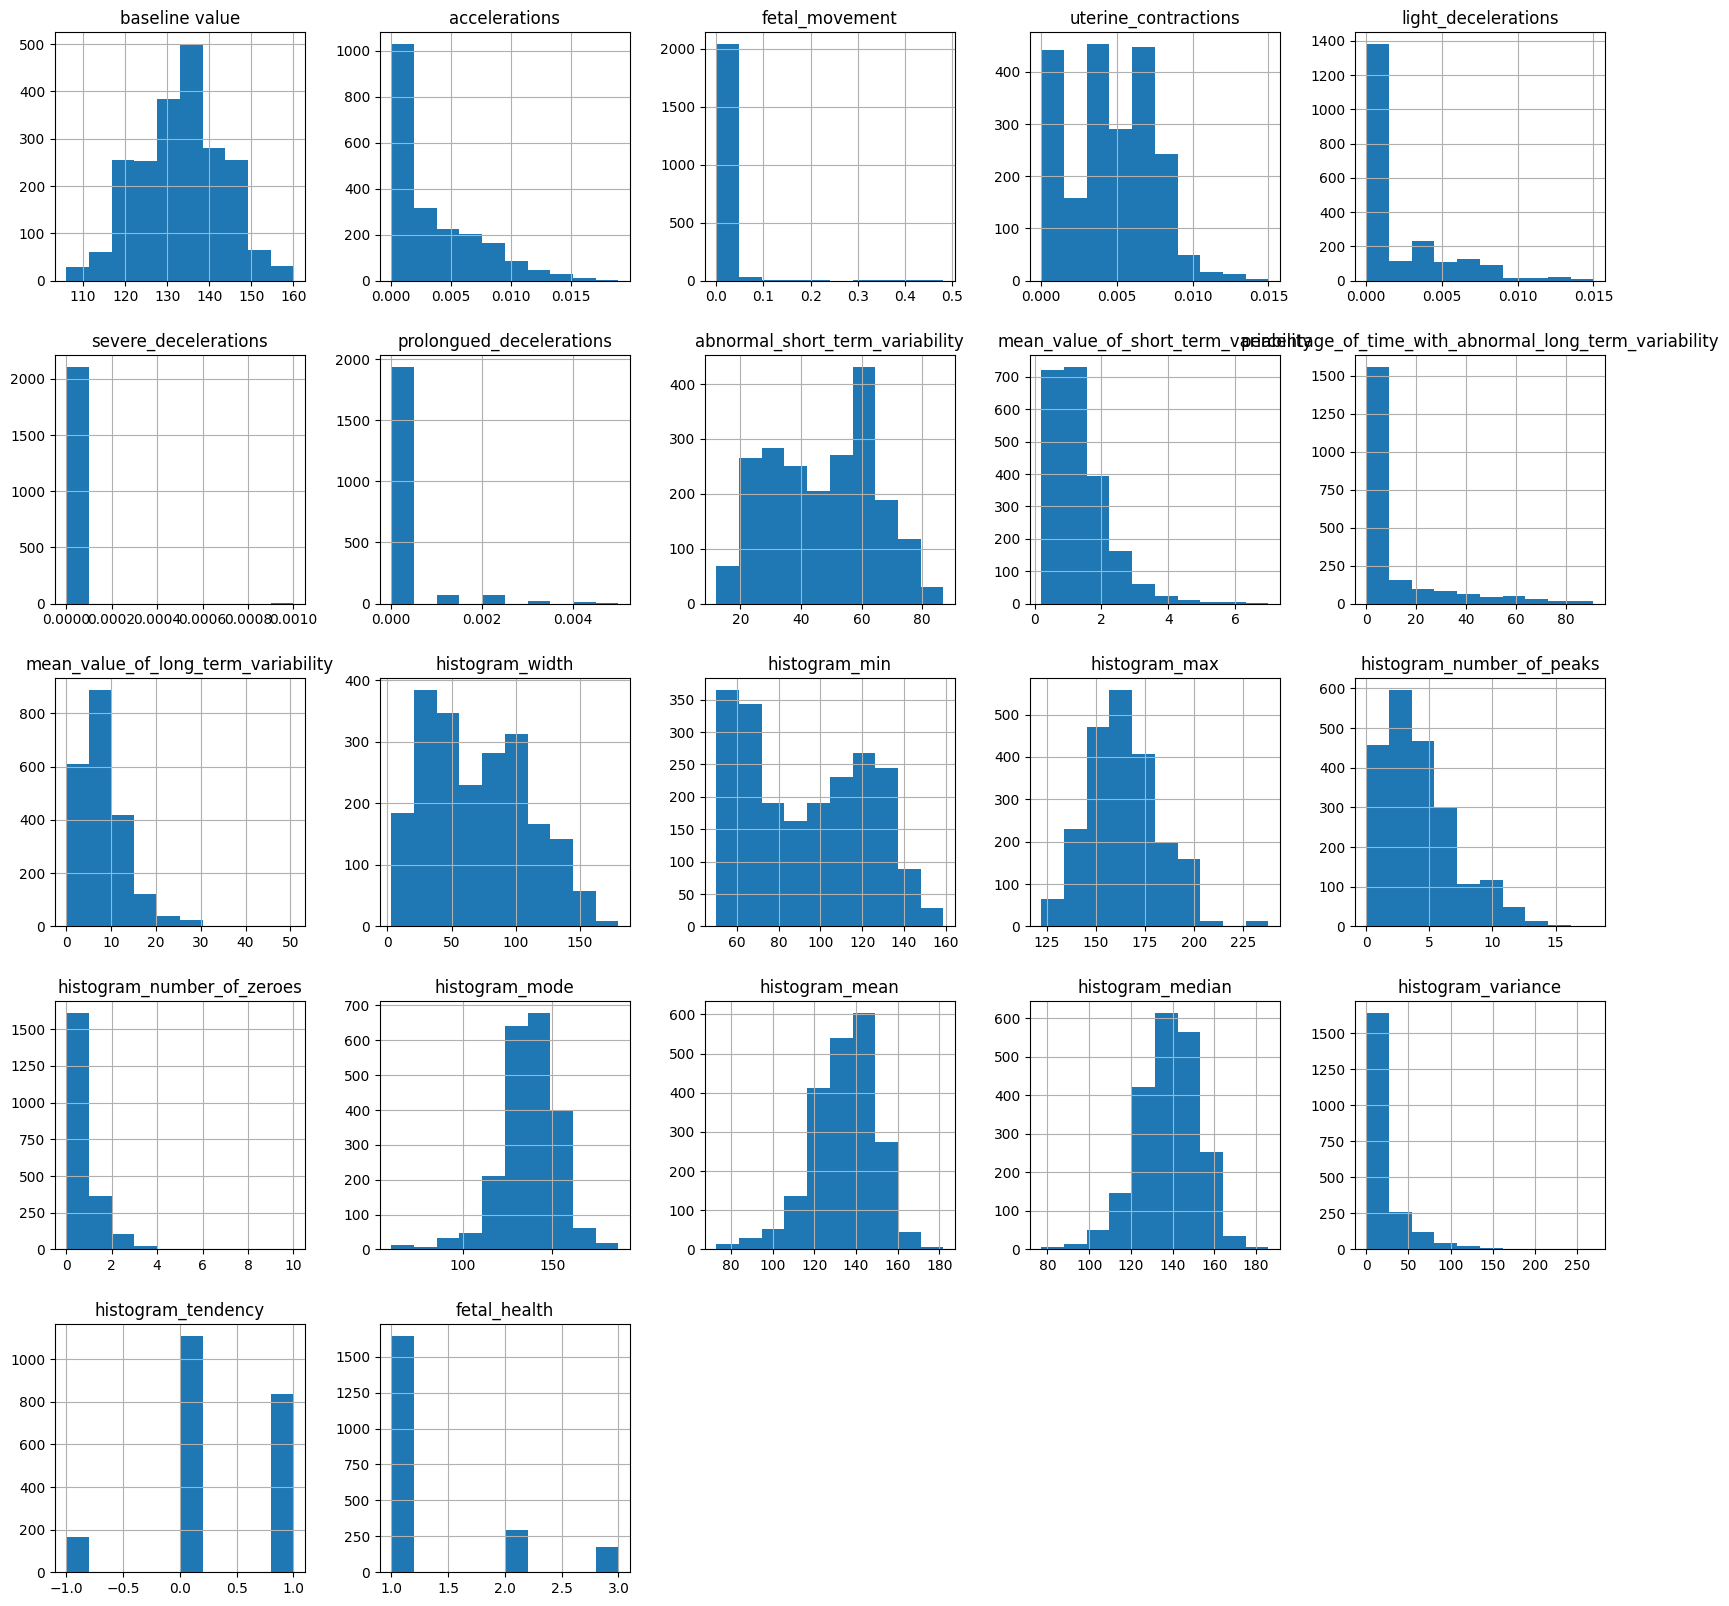

In [73]:
# Plotting the distribution of the fetal health datadata.hist(figsize=(20,20));
import matplotlib.pyplot as plt

health_data1_cleaned.hist(figsize=(20,20));

plt.show()
# From some graphs you can some data does not have a normal distribution, some bars are discrete

Conclusion: The histograms demonstrate various and widely dispersed data.


In [74]:
# From the histograms, our variable of interest 'fetal_health' has 3 discrete values; 1,2,3
health_data1_cleaned.fetal_health.unique()

array([2., 1., 3.])

Also used correlation matrix as below.

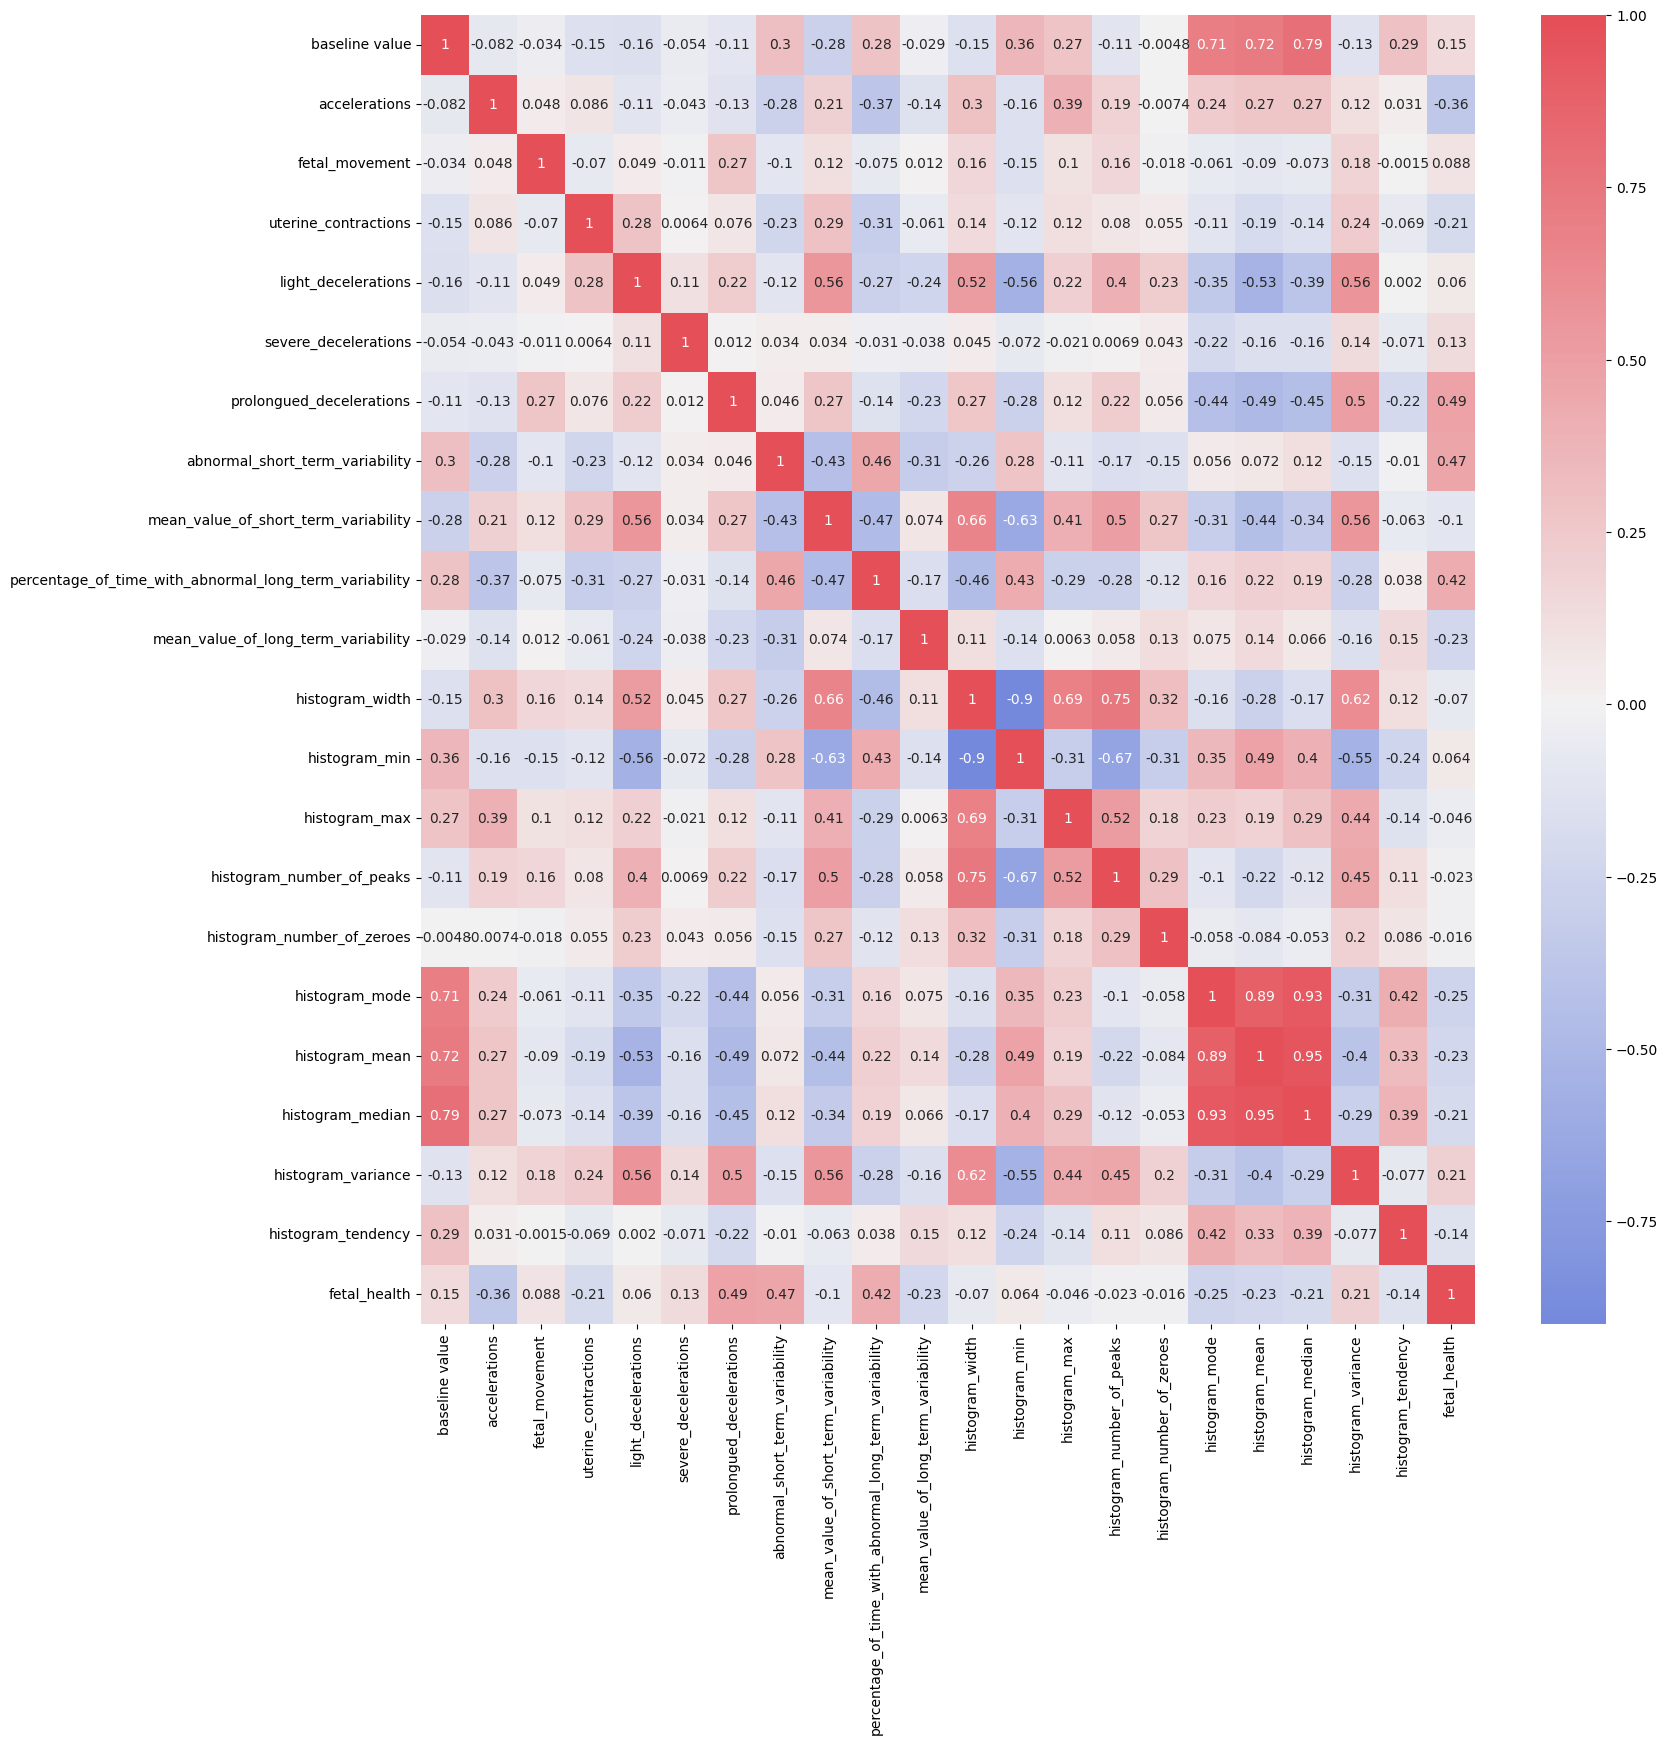

In [72]:
%matplotlib inline
#correlation matrix code

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# compute correlation matrix
corr_health_data1 = health_data1_cleaned.corr()

# created heatmap plot of correlation matrix

plt.figure(figsize=(17,17))  
correlation_map = sns.diverging_palette(260, 10, s=70, l=55, n=9, as_cmap=True)
sns.heatmap(corr_health_data1, annot=True, cmap=correlation_map, center=0)
plt.show()

The following were the most dispersed data.
The following variables have higher correlation with fetal_health
* prolongued_decelerations
* abnormal_short_term_variability
* percentage_of_time_with_abnormal_long_term_variability
* Acceleration
* fetal_movement

### Prolongued Decelerations Vs Fetal Movement by Fetal Health**
* Understanding the relationship between these two variables

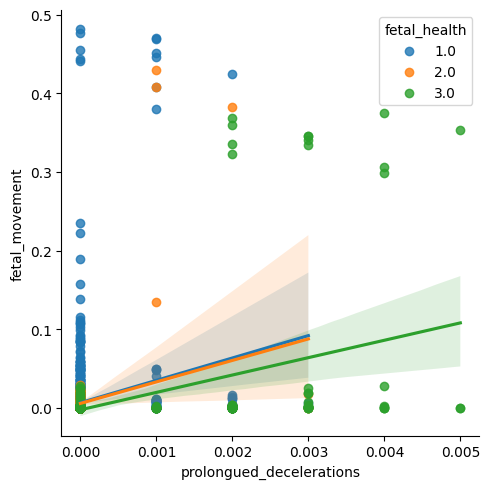

In [76]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 
sns.lmplot(health_data1_cleaned,x="prolongued_decelerations",y="fetal_movement", hue="fetal_health",legend_out=False)
plt.show()



 ### Fetal Movement by Fetal Health Vs Abnormal Short Term Variability

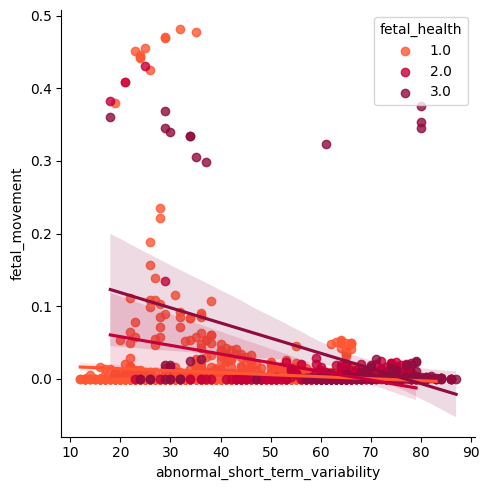

In [78]:

# Define a custom color palette
colours = ["#FF5733", "#C70039", "#900C3F"]

sns.lmplot(health_data1_cleaned, x="abnormal_short_term_variability",y="fetal_movement",palette = colours, hue="fetal_health",legend_out=False)
plt.show()

Conclusion: These two exhibit a weak relationship, however there are outliers present.

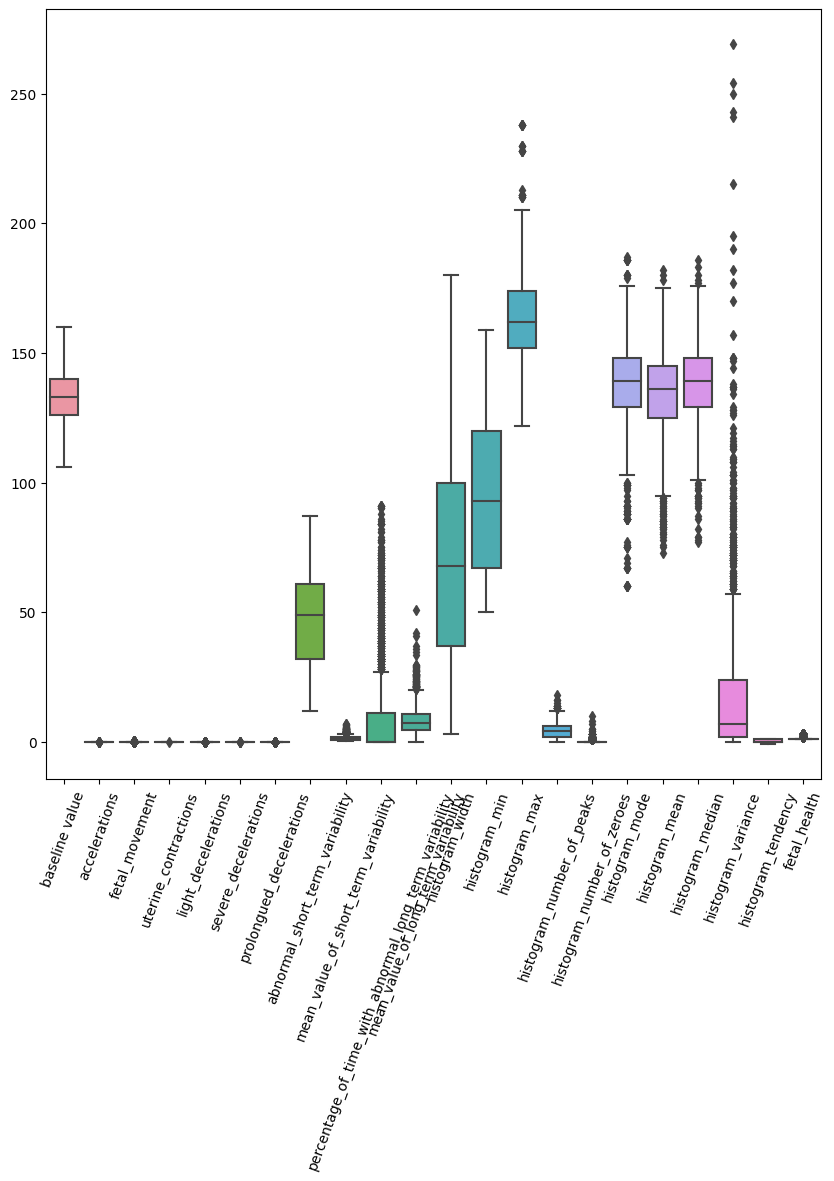

In [79]:
clrs =["#FF5733","#f7b2b0","#c98ea6","#8f7198","#50587f", "#003f5c","#C70039", "#900C3F"]
plt.figure(figsize=(10,10))
#sns.boxenplot(data = dfetcnd)

sns.boxplot(health_data1_cleaned)
plt.xticks(rotation=70)
plt.show()

# **INSTRUCTION 2** 

Use pandas Profiling to export a pdf report of your data (explain how the report informs your future decisions)

In [82]:
# !pip install pandas-profiling #This code didn't work, because of outdated pip. I had to upgrade first.
# %pip install --upgrade pip
# %pip install pandas --upgrade
# %pip install pandas-profiling --upgrade
# %pip install -U ydata-profiling[notebook]
from ydata_profiling import ProfileReport

# import ydata_profiling
import ydata_profiling as ypf

# This EDA Report then infers the decision of Data Cleaning
theprofile = ypf.ProfileReport(health_data1_cleaned, title=" Fetal Health Profile Report", html={'style': {'full_width': True}})

In [ ]:
# Save the HTML Report to a file, use "to_file() function"
#theprofile.to_file("Classification plot.html") # open the data.html in a web browser to view the Report, as I failed to save a pdf

In [ ]:
# To view the Report within the notebook
theprofile.to_notebook_iframe()

## Transformation of the data

### Ploting the data before rescaling

<AxesSubplot: >

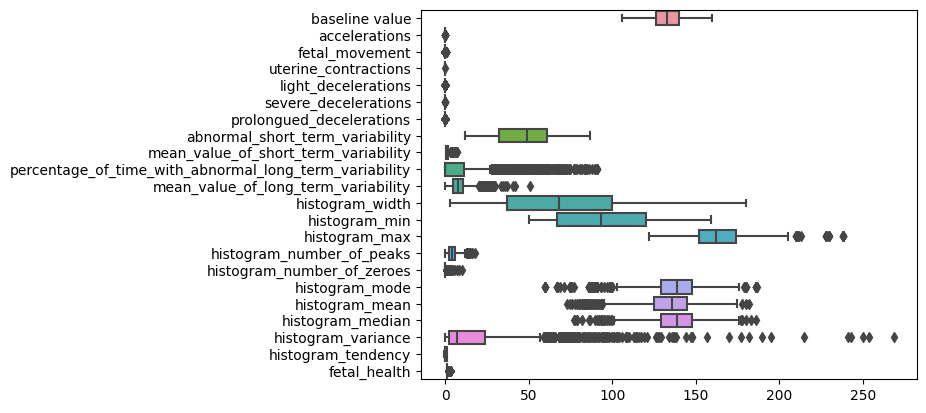

In [86]:
sns.boxplot(health_data1_cleaned, orient = 'h')

### Performing normalization/data transformation

In [102]:
from sklearn.preprocessing import Normalizer

new_array = health_data1_cleaned.values
# separate array into input and output components
X = new_array[:,0:21]
Y = new_array[:,21]
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)

# summarize transformed data
set_printoptions(precision=3)
print(normalizedX[0:5,:])
print(type(normalizedX))#print the data type so we can know what we are 
#working with in the dataset.

[[3.823e-01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.325e-01 1.593e-03 1.370e-01 7.645e-03 2.039e-01 1.975e-01 4.014e-01
  6.371e-03 0.000e+00 3.823e-01 4.364e-01 3.855e-01 2.325e-01 3.186e-03]
 [3.570e-01 1.623e-05 0.000e+00 1.623e-05 8.114e-06 0.000e+00 0.000e+00
  4.598e-02 5.680e-03 0.000e+00 2.813e-02 3.516e-01 1.839e-01 5.355e-01
  1.623e-02 2.705e-03 3.813e-01 3.678e-01 3.786e-01 3.245e-02 0.000e+00]
 [3.604e-01 8.129e-06 0.000e+00 2.168e-05 8.129e-06 0.000e+00 0.000e+00
  4.335e-02 5.690e-03 0.000e+00 3.631e-02 3.523e-01 1.843e-01 5.365e-01
  1.355e-02 2.710e-03 3.821e-01 3.658e-01 3.739e-01 3.523e-02 0.000e+00]
 [3.869e-01 8.663e-06 0.000e+00 2.310e-05 8.663e-06 0.000e+00 0.000e+00
  4.620e-02 6.930e-03 0.000e+00 6.641e-02 3.378e-01 1.530e-01 4.909e-01
  3.176e-02 0.000e+00 3.956e-01 3.869e-01 3.956e-01 3.754e-02 2.888e-03]
 [3.811e-01 2.021e-05 0.000e+00 2.309e-05 0.000e+00 0.000e+00 0.000e+00
  4.619e-02 6.928e-03 0.000e+00 5.745e-02 3.378e-01 1.530e-0

<AxesSubplot: >

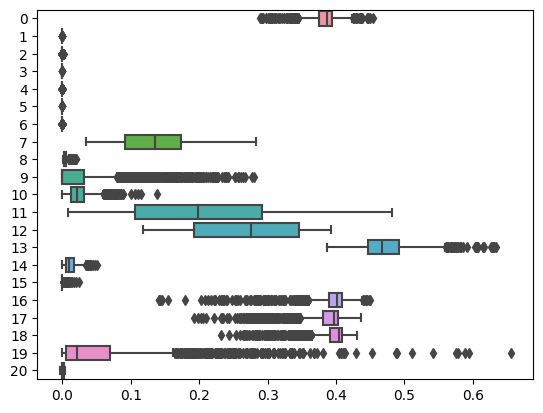

In [103]:
#The plot after transformation is shown below

sns.boxplot(normalizedX, orient = 'h')

### Standardizing the data.

In [99]:
from numpy import set_printoptions
from sklearn.preprocessing import StandardScaler
array2 = health_data1_cleaned.values
# separate array into input and output components
X = array2[:,0:21]
Y = array2[:,21]
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[-1.353 -0.824 -0.203 -1.492 -0.641 -0.058 -0.27   1.514 -0.944  1.811
  -1.024 -0.168 -1.068 -2.124 -0.704 -0.46  -1.064  0.154 -1.181  1.863
   1.116]
 [-0.133  0.726 -0.203  0.549  0.371 -0.058 -0.27  -1.746  0.865 -0.534
   0.397  1.525 -0.865  1.89   0.652  0.953  0.216  0.09   0.132 -0.238
  -0.521]
 [-0.031 -0.049 -0.203  1.229  0.371 -0.058 -0.27  -1.805  0.865 -0.534
   0.929  1.525 -0.865  1.89   0.313  0.953  0.216  0.026 -0.006 -0.203
  -0.521]
 [ 0.071 -0.049 -0.203  1.229  0.371 -0.058 -0.27  -1.805  1.205 -0.534
   2.634  1.191 -1.372  0.329  2.346 -0.46  -0.028 -0.038 -0.075 -0.203
   1.116]
 [-0.133  0.985 -0.203  1.229 -0.641 -0.058 -0.27  -1.805  1.205 -0.534
   2.083  1.191 -1.372  0.329  1.668 -0.46  -0.028  0.09  -0.006 -0.272
   1.116]]


<AxesSubplot: >

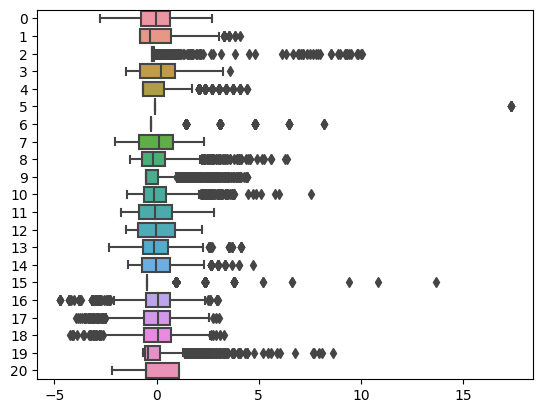

In [101]:
# the standardized data output boxplot
sns.boxplot(rescaledX, orient = 'h')

## Evaluation model and Spot checking

Given that the data are categorical and have only one classification, I employed linear machine learning algorithms, particularly logistic regression, for classification.

The support vector machines were also employed. These have a component of categorisation. But I'm testing each model to see which one performs the best.

Model - Spot checking

Testing Linear Algorithms

Logistic Regression classification

In [104]:
#Logistic Regression
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import f1_score, make_scorer

import warnings
warnings.filterwarnings('ignore')

array = health_data1_cleaned.values
X = array[:,0:21]  # done based on the number of rows in the data
Y = array[:,21]
num_folds = 10
kfold = KFold(n_splits=10, shuffle=True, random_state=7) #k-fold repeatedly splits the data;k is the user-specified number. The first model is trained using the first fold and the second using the second fold
model = LogisticRegression()
results = cross_val_score(model, rescaledX, Y, cv=kfold)
print(results.mean())

0.8916301529106679


### Linear Discriminant Analysis

In [106]:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# load the data
data = pd.read_csv("fetal_health.csv")
array = health_data1_cleaned.values
X = array[:,0:21]
Y = array[:,21]
num_folds = 10

kfold = KFold(n_splits=10, shuffle=True, random_state=7)
model = LinearDiscriminantAnalysis()
results = cross_val_score(model, rescaledX, Y, cv=kfold)
print(results.mean())

0.8760328176696772


### Naive Bayes

In [107]:
from sklearn.naive_bayes import GaussianNB
array = health_data1_cleaned.values
X = array[:,0:21]
Y = array[:,21]
kfold = KFold(n_splits=10, shuffle=True, random_state=7)
model = GaussianNB()
results = cross_val_score(model, rescaledX, Y, cv=kfold)
print(results.mean())

0.7250044710721631


***CONCLUSION***

From the linear Machine learning Algorithms, the Logistic regression performed better than all others. However, the Linear Discriminant Analysis also significantly performed well with a minimal difference in the mean value.

## Nonlinear Machine Learning Algorithms

### k-Nearest Neighbors

In [110]:

from sklearn.neighbors import KNeighborsClassifier
# load the data

array = health_data1_cleaned.values
X = array[:,0:21]
Y = array[:,21]
num_folds = 10
kfold = KFold(n_splits=10, shuffle=True, random_state=7)
model = KNeighborsClassifier()
results = cross_val_score(model, rescaledX, Y, cv=kfold)
print(results.mean())

0.9015849950818206


## Classiffication and Regression Trees

In [111]:
from sklearn.tree import DecisionTreeClassifier
array = health_data1_cleaned.values

X = array[:,0:21]
Y = array[:,21]
kfold = KFold(n_splits=10, shuffle=True, random_state=7)
model = DecisionTreeClassifier()
results = cross_val_score(model, rescaledX, Y, cv=kfold)
print(results.mean())

0.9205065724760798


## Support Vector Machines

In [112]:

# import the libraries
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

# load the data
data = health_data1_cleaned

array = data.values
X = array[:,0:21]
Y = array[:,21]
kfold = KFold(n_splits=10,shuffle=True, random_state=7)
model = SVC()
results = cross_val_score(model, rescaledX, Y, cv=kfold)
print(results.mean())


0.911984708933202



***CONCLUSION***

From the Non-linear Machine Learning Algorithms, the DecisionTreeClassifier performed better than Support Vector Machines and k-Nearest Neighbours as shown by the accuracy scores above

# **INSTRUCTION 4: Evaluating the models**

I had to choose the F1_weighted score as the evaluation metric for the model accuracy. F1 score combines precision(number of true positives divided by total number of predictive positives) and recall(number of true positives divided by the total number of actual positives)

But in this case, F1 may not be accurate as the data set is imbalanced with so many zeros in some variables as seen from the histogram graphs. Therefore, the weighted f1 score is computed (individual F1 score for each class is weighted by the number of samples in each class).

Model Comparison based on F1-weighted score

('LR', 0.8914399032092447, 0.015168462483649116)
('LDA', 0.8737000928987146, 0.02791163472092991)
('KNN', 0.9000696982364766, 0.020862611717820535)
('CART', 0.9193186721971511, 0.016335838127060586)
('NB', 0.7623821324165656, 0.033989631357606374)
('SVM', 0.9085194048269614, 0.02369277753538675)
('RF', 0.9402005308269675, 0.01350556834798044)
('GB', 0.9496130588256987, 0.012413174719350923)
('ADA', 0.8885018833050283, 0.015816703877069977)


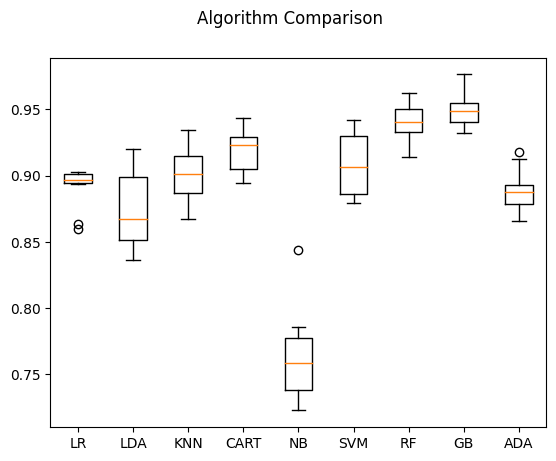

In [113]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

# Prepare models and add them to a list
models = []
models.append(('LR', LogisticRegression(max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('ADA', AdaBoostClassifier()))

# Evaluate each model in turn
results = []
names = []
scoring = 'f1_weighted'

for name, model in models:
    skfold = StratifiedKFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, rescaledX, Y, cv=skfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## CONCLUSION

GradientBoostingClassifier(GB), which has the highest mean value of the lot, can be considered the best model. Since it has a greater F1 weighted score than the others, it has the highest accuracy, precision, and recall scores. The GB and RF perform better than the CART, as can be seen in the plot, but the CART is still a strong model and performs relatively better than the others.